In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from PIL import Image
import albumentations as A
import random

In [2]:
image = Image.open('../dolphin.jpg')
image_gray = image.convert('L')
image_np = np.array(image_gray)
image_np = image_np
print(image_np.shape)

(128, 128)


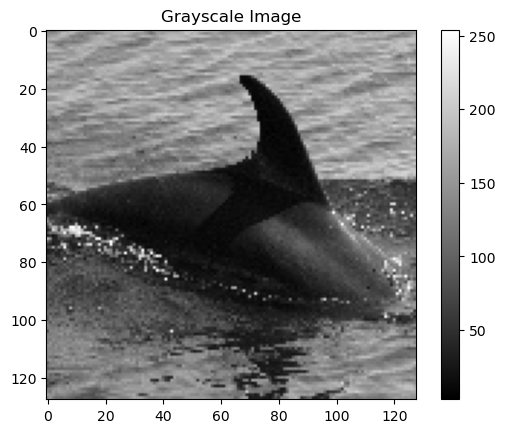

In [3]:
plt.imshow(image_np, cmap='gray')  # Use 'gray' colormap for grayscale images
plt.colorbar()  # Optional: add a colorbar
plt.title("Grayscale Image")
plt.show()

(128, 128)


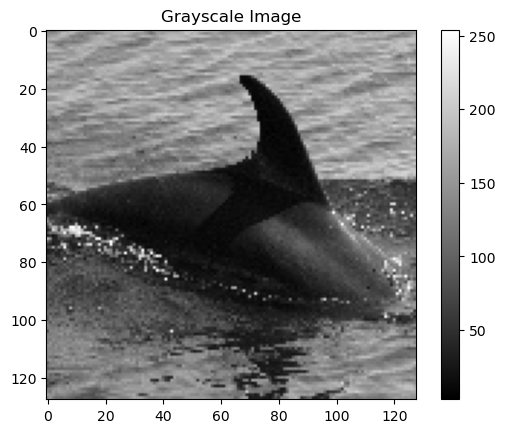

In [33]:
transform = A.HorizontalFlip(p=0.5)
#random.seed(7)
augmented_image = transform(image=image_np)['image']
print(augmented_image.shape)
plt.imshow(augmented_image, cmap='gray')  # Use 'gray' colormap for grayscale images
plt.colorbar()  # Optional: add a colorbar
plt.title("Grayscale Image")
plt.show()

In [39]:
features = np.load("../datasets/dataset_9/features.npy")
features = features.transpose(0, 2, 3, 1)
print(features.shape)

(4557, 64, 64, 3)


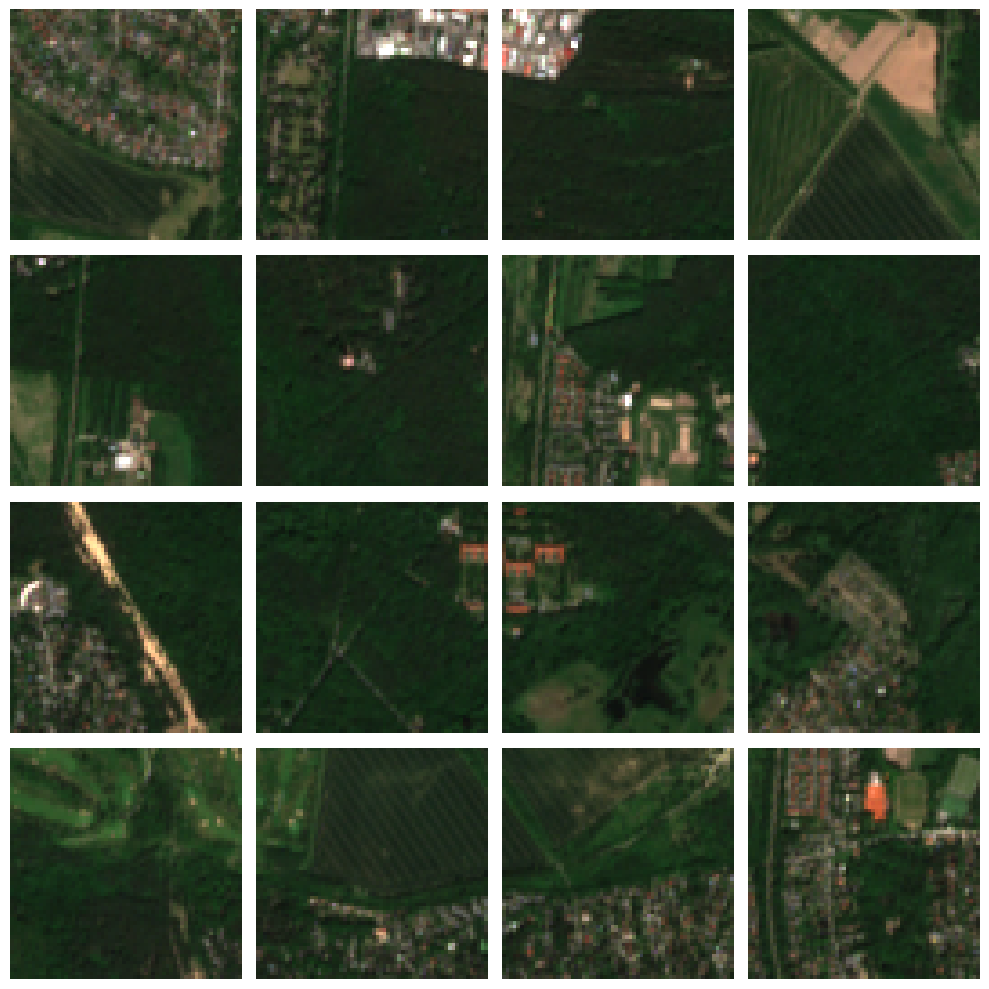

In [40]:
features_16 = features[:16]
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

# Plot each image
for i in range(4):
    for j in range(4):
        ax = axes[i, j]
        ax.imshow(features_16[i * 4 + j])
        ax.axis('off')  # Turn off the axis

# Show the plot
plt.tight_layout()
plt.show()

In [38]:
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])

In [41]:
batch_dict = [{'image': img} for img in features]
augmented_features_dict = transform(image=batch_dict)
augmented_features = np.stack([d['image'] for d in augmented_features_dict], axis=0)

TypeError: image must be numpy array type